## Customer Segmentation using RFM Analysis Part 2

In [1]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [4]:
# Loading rfm data from Part 1
rfm = pd.read_csv('/Users/nikhiljoshi/Capstone Project/NewGithub Profile/Marketing Project RFM/data/rfm.csv', index_col ='CustomerID')

In [5]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


<AxesSubplot:>

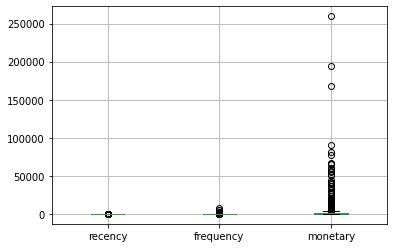

In [6]:
# Create box plots to check for outliers
rfm.boxplot()

In [7]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             recency  frequency   monetary
CustomerID                                
12346.0     2.344127   0.410395  10.068168
12747.0     0.901588   0.057992   0.311802
12748.0     0.921685  20.690005   4.258219
12749.0     0.891539   0.498828   0.297632
12820.0     0.891539   0.144057   0.123169
...              ...        ...        ...
18280.0     1.861791   0.369067   0.225028
18281.0     0.887072   0.382843   0.238395
18282.0     0.851345   0.359883   0.225295
18283.0     0.891539   3.056591   0.030822
18287.0     0.499642   0.093545   0.003532

[3921 rows x 3 columns]


In [8]:
rfm_clean = rfm[(z < 3).all(axis=1)]

- This code has been used to remove outlier data from rfm file

In [9]:
rfm.shape

(3921, 3)

In [10]:
rfm_clean.shape

(3868, 3)

<AxesSubplot:>

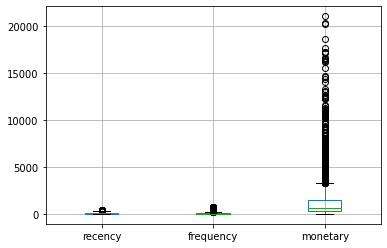

In [11]:
rfm_clean.boxplot()

- As per the plot above we see that there are no more outliers while as comapred to the previous plot, there were visible outliers

array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

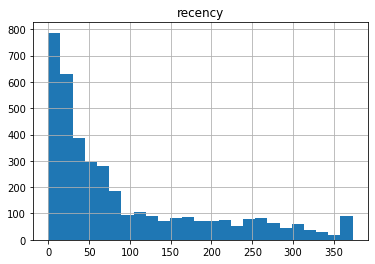

In [12]:
rfm_clean.hist(column='recency', bins=25)

- The recency plot seems to be similar to that of exercise 1

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

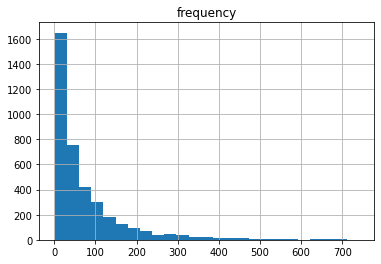

In [13]:
rfm_clean.hist(column='frequency', bins=25)


The frequency data seems to be more distributed as compared to previous plot while the value range has changed from 0-1300 to 0 to 600 approx.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

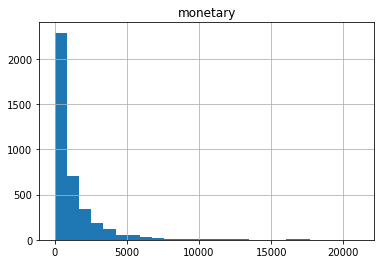

In [14]:
rfm_clean.hist(column='monetary', bins=25)

- In this plot, the values have been reduced from about 25000(on x axis) to less then 15000

## Performing cluster analysis using K-means clustering with the original rfm dataframe


In [15]:
X = rfm

In [16]:
X.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


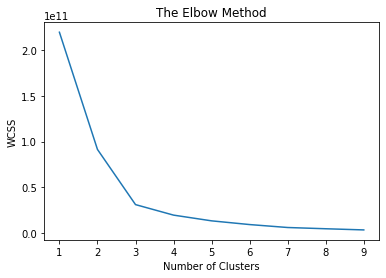

In [17]:
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [18]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)


In [19]:
y_kmeans

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

In [20]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [21]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12346.0,325,1,77183,2
12747.0,2,103,4196,0
12748.0,0,4596,33719,2
12749.0,3,199,4090,0
12820.0,3,59,942,0


## Plot the graphs

/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/nikhiljoshi/miniforge3/envs/mlp/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


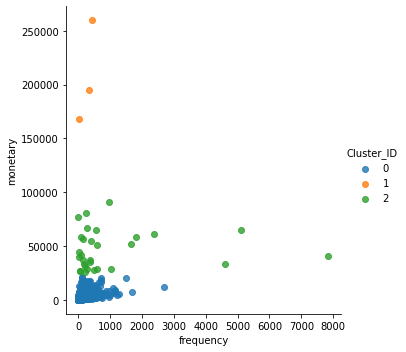

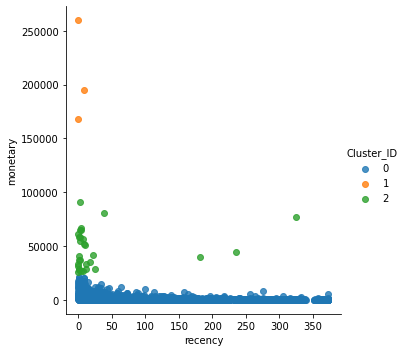

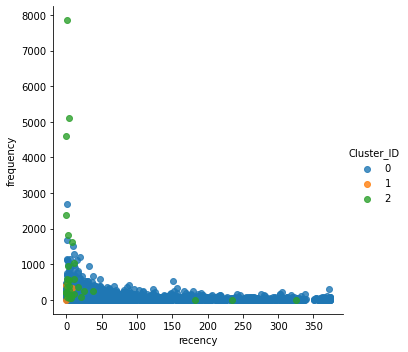

In [22]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

### Q. Comment on the plots

- From the plot 1, "Monetary vs Frequency", we observe that Cluster ID 1 group was spending more but was not doing it frequently whereas cluster id 2 was the one which spent decent amount along with being frequent
- From the plot 2, "Monetary vs Recency", we observe that Cluster ID 1 group was spending more but was not recent whereas cluster id 2 was the one which spent decent amount along with being recent
- From the plot 3, "Frequency vs Recency", we observe that Cluster ID 0 group was spending frequently along with making recent transactions while cluster id group 2 was although frequently spending more however cluster id 0 here has been spending consistently but not as much frequently as ID 2

Performing Cluster Analysis with k=4

In [23]:
kmeans = KMeans(n_clusters = 4)
y_kmeans2 = kmeans.fit_predict(X)


In [24]:
y_kmeans2

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [25]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID2'] = y_kmeans2

In [26]:
X1 = rfm_clean

### Performing cluster analysis with the outliers removed rfm dataframe. Deciding on K value post that

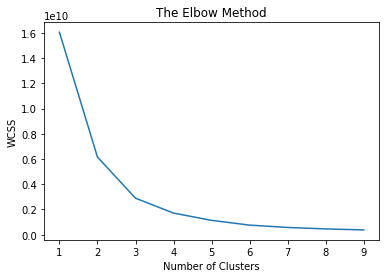

In [27]:
wcss2 = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X1)
    wcss2.append(kmeans.inertia_)
plt.plot(range(1,10), wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# Calculate mean for every cluster 


## Performing cluster analysis using hierarchical clustering with the cleaned rfm dataframe

In [28]:
# Import the libraries
import scipy.cluster.hierarchy as sch

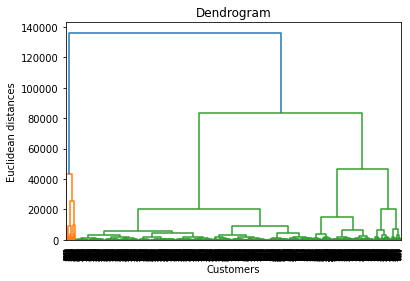

In [29]:
# Build a dendrogram using the minimum variance method
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Identify the clusters based on dendrogram

In [30]:
# Train the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)

In [31]:
X1['Cluster_ID'] = y_hc

/var/folders/57/tx7rlqy15q167jrtg5rd5p_40000gn/T/ipykernel_50344/358810804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Cluster_ID'] = y_hc


In [32]:
X1.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12747.0,2,103,4196,0
12749.0,3,199,4090,0
12820.0,3,59,942,0
12821.0,214,6,92,0
12822.0,70,46,948,0


### Creating all the three plots again.

## Evaluate Clustering 


In [33]:
# Import libraries
from sklearn import cluster
from sklearn import metrics

In [34]:
# Calculate Silhouette score for different cluster values
krange = list(range(2,5))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X1)

  silhouette_avg = metrics.silhouette_score(X1, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

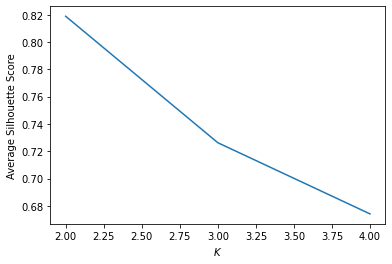

In [35]:
# PLot the score
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()